# Introduction à la probabilité et aux statistiques
Dans ce carnet, nous allons explorer certains des concepts que nous avons abordés précédemment. De nombreux concepts de probabilité et de statistiques sont bien représentés dans les principales bibliothèques de traitement de données en Python, telles que `numpy` et `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variables aléatoires et distributions
Commençons par tirer un échantillon de 30 valeurs à partir d'une distribution uniforme entre 0 et 9. Nous calculerons également la moyenne et la variance.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Pour estimer visuellement combien de valeurs différentes se trouvent dans l'échantillon, nous pouvons tracer l'**histogramme** :


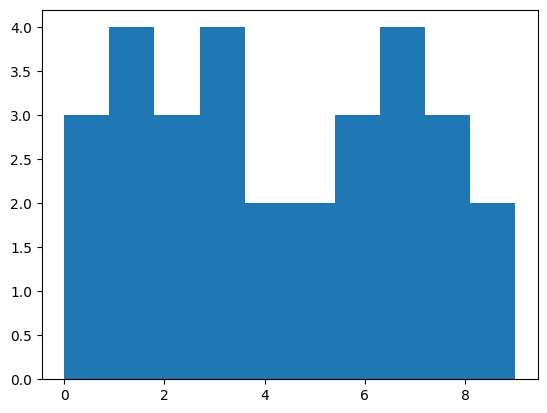

In [119]:
plt.hist(sample)
plt.show()

## Analyse de données réelles

La moyenne et la variance sont très importantes lorsqu'il s'agit d'analyser des données du monde réel. Chargons les données sur les joueurs de baseball depuis [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Nous utilisons ici un package appelé [**Pandas**](https://pandas.pydata.org/) pour l'analyse de données. Nous parlerons davantage de Pandas et du travail avec les données en Python plus tard dans ce cours.

Calculons les valeurs moyennes pour l'âge, la taille et le poids :


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Concentrons-nous maintenant sur la taille et calculons l'écart type et la variance :


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


En plus de la moyenne, il est logique de regarder la valeur médiane et les quartiles. Ils peuvent être visualisés à l'aide d'un **boîte à moustaches** :


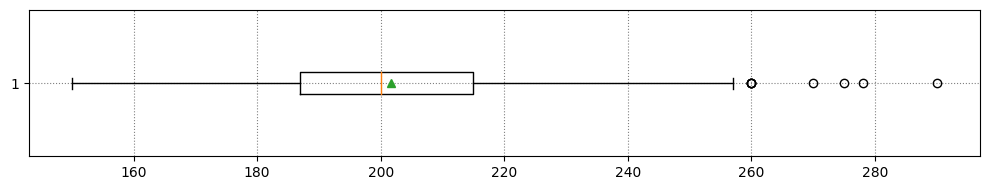

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Nous pouvons également créer des boîtes à moustaches pour des sous-ensembles de notre ensemble de données, par exemple, regroupés par rôle de joueur.


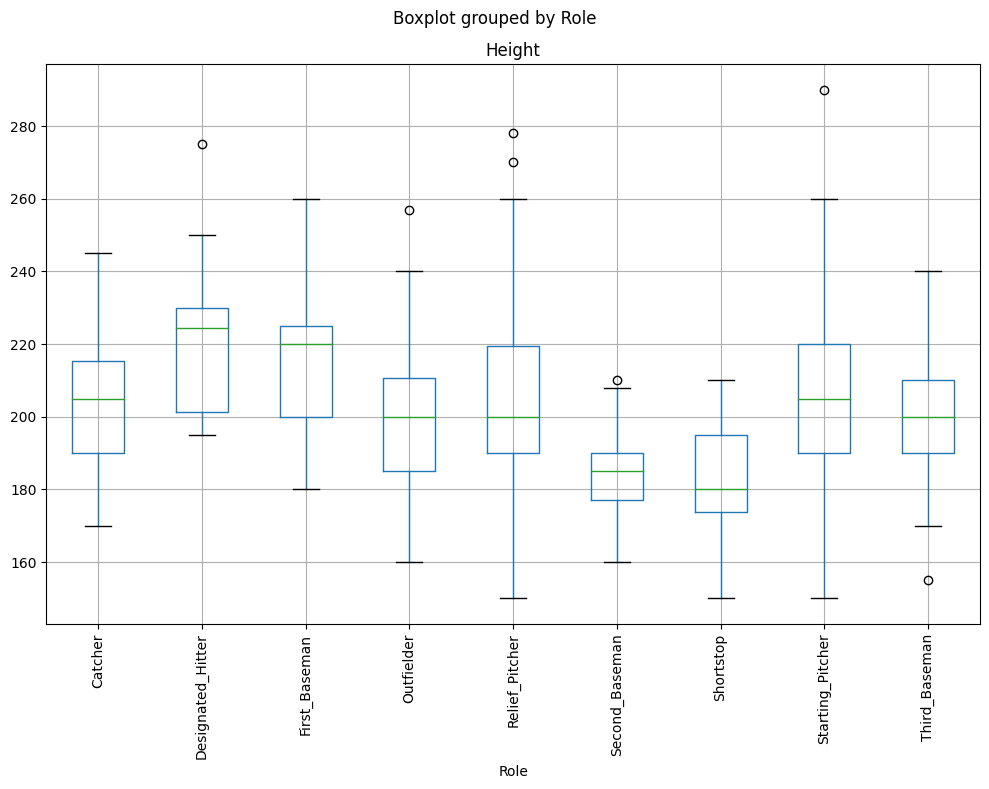

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Note** : Ce diagramme suggère qu'en moyenne, les tailles des joueurs de première base sont supérieures à celles des joueurs de deuxième base. Plus tard, nous apprendrons comment tester cette hypothèse de manière plus formelle et comment démontrer que nos données sont statistiquement significatives pour le prouver.

L'âge, la taille et le poids sont tous des variables aléatoires continues. À votre avis, quelle est leur distribution ? Une bonne façon de le découvrir est de tracer l'histogramme des valeurs :


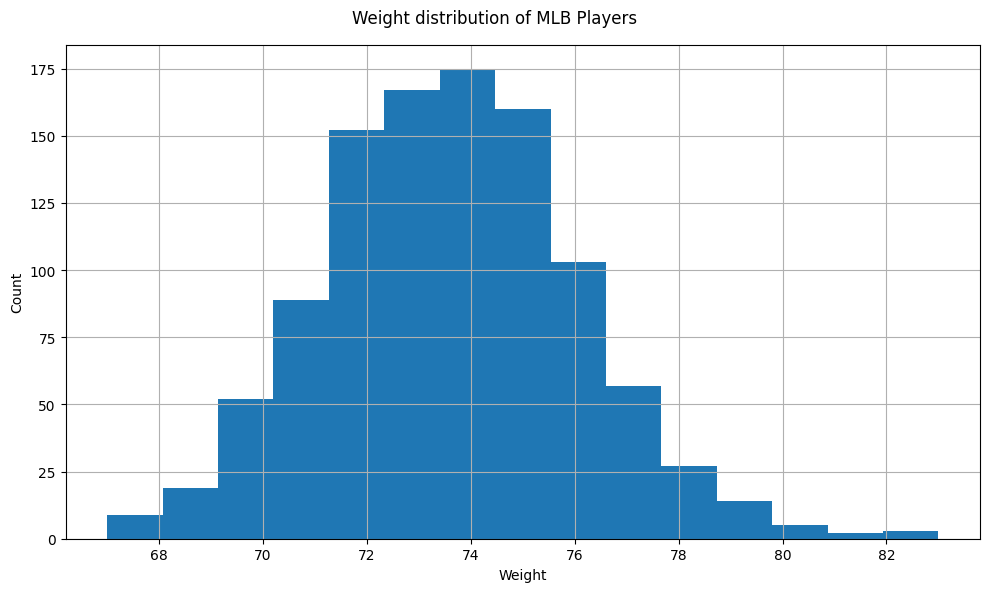

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribution Normale

Créons un échantillon artificiel de poids qui suit une distribution normale avec la même moyenne et variance que nos données réelles :


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

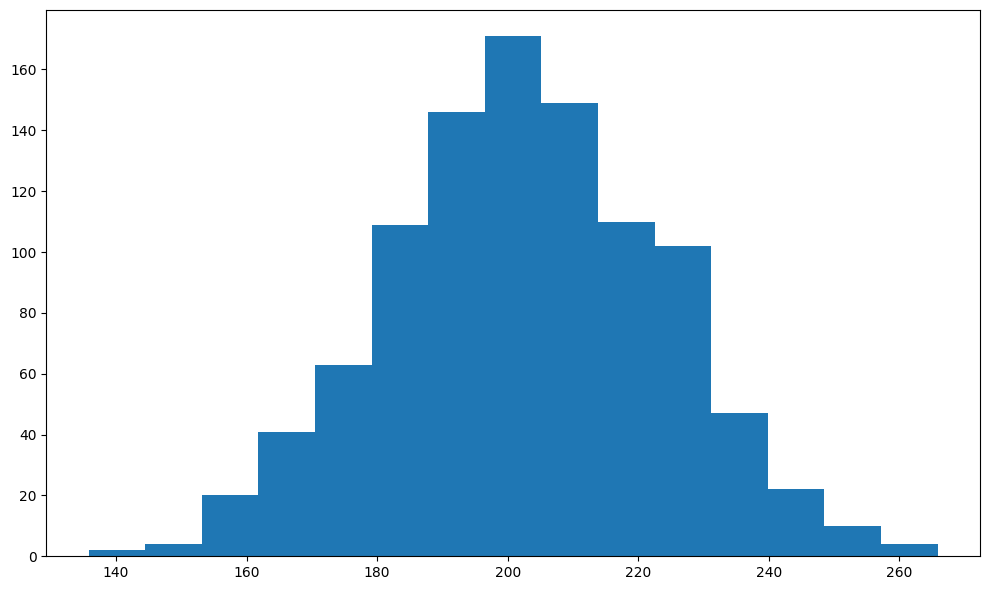

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

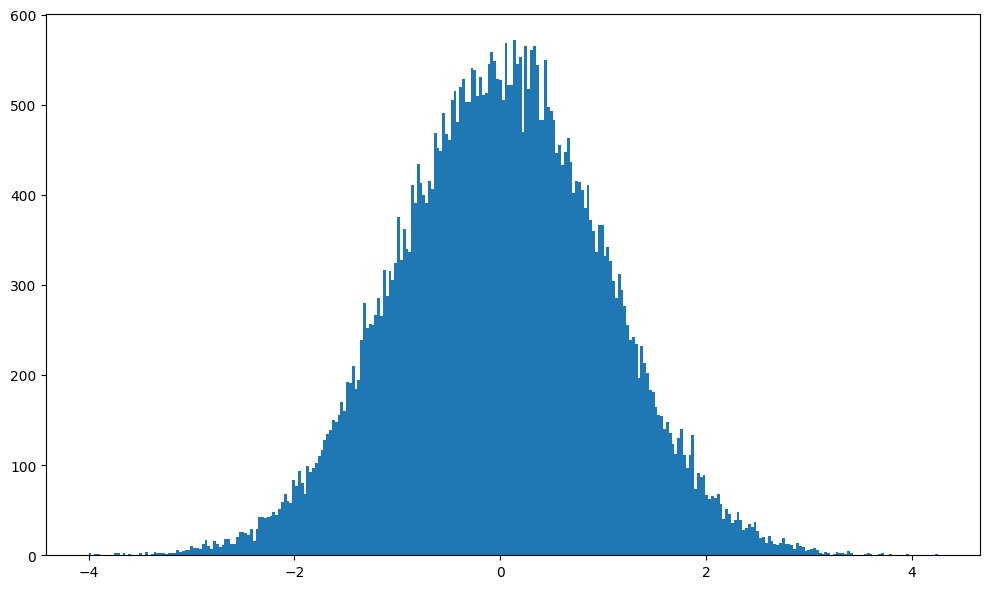

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Étant donné que la plupart des valeurs dans la vie réelle suivent une distribution normale, nous ne devrions pas utiliser un générateur de nombres aléatoires uniformes pour générer des données d'échantillon. Voici ce qui se passe si nous essayons de générer des poids avec une distribution uniforme (générée par `np.random.rand`) :


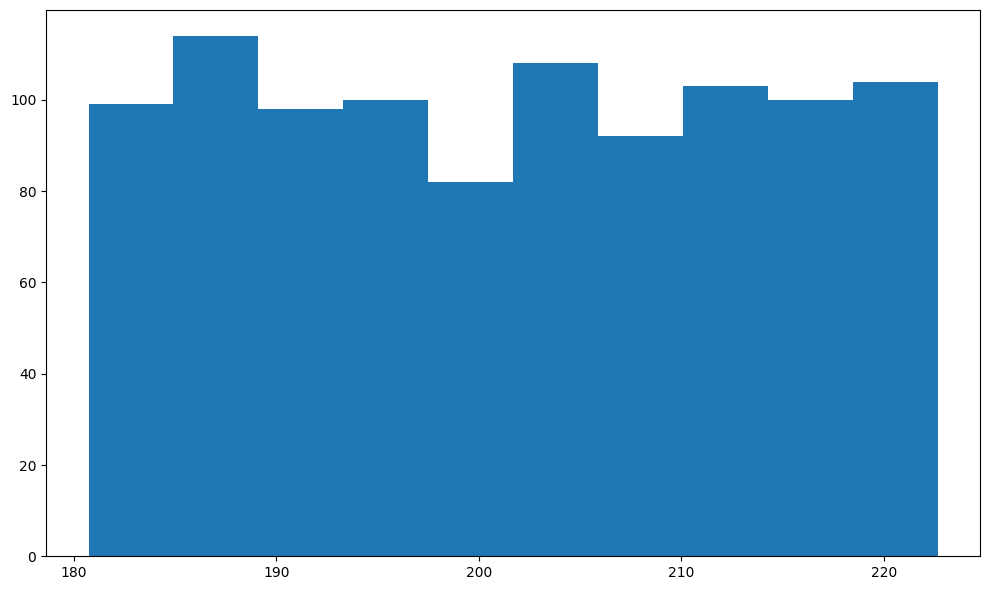

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervalles de Confiance

Calculons maintenant les intervalles de confiance pour les poids et les tailles des joueurs de baseball. Nous utiliserons le code [de cette discussion sur Stack Overflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) :


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Test d'hypothèses

Explorons les différents rôles dans notre ensemble de données sur les joueurs de baseball :


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Nous pouvons constater que les intervalles ne se chevauchent pas.

Une méthode statistiquement plus correcte pour prouver l'hypothèse est d'utiliser un **test t de Student** :


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Les deux valeurs renvoyées par la fonction `ttest_ind` sont :  
* La p-value peut être considérée comme la probabilité que deux distributions aient la même moyenne. Dans notre cas, elle est très faible, ce qui signifie qu'il y a de fortes preuves indiquant que les joueurs de première base sont plus grands.  
* La t-value est la valeur intermédiaire de la différence de moyennes normalisée utilisée dans le test t, et elle est comparée à une valeur seuil pour un niveau de confiance donné.  


## Simuler une distribution normale avec le théorème central limite

Le générateur pseudo-aléatoire de Python est conçu pour nous fournir une distribution uniforme. Si nous souhaitons créer un générateur pour une distribution normale, nous pouvons utiliser le théorème central limite. Pour obtenir une valeur normalement distribuée, il suffit de calculer la moyenne d'un échantillon généré de manière uniforme.


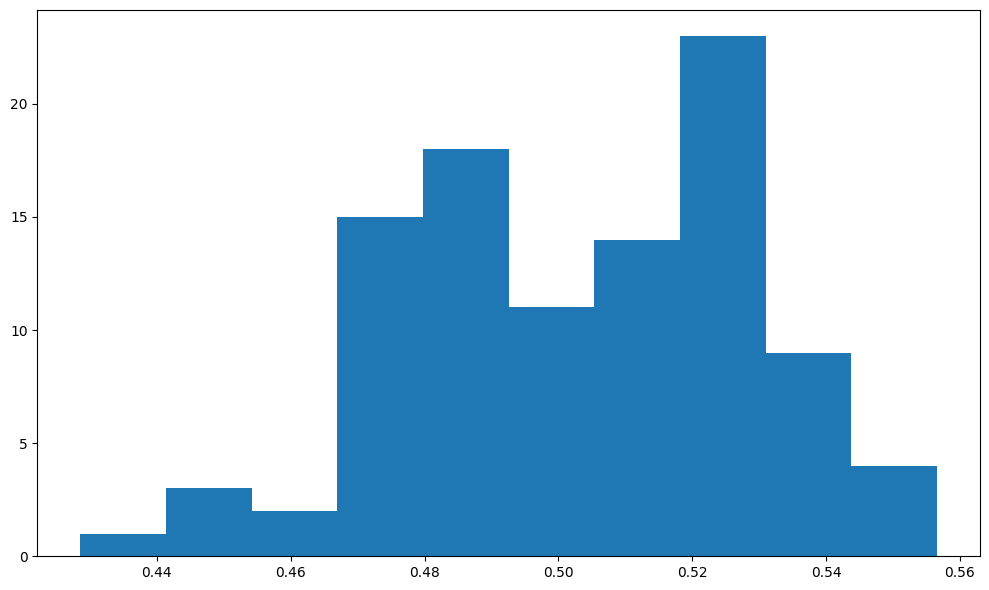

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Corrélation et la Maléfique Corporation de Baseball

La corrélation nous permet de trouver des relations entre des séquences de données. Dans notre exemple fictif, imaginons qu'il existe une maléfique corporation de baseball qui paie ses joueurs en fonction de leur taille - plus le joueur est grand, plus il/elle reçoit d'argent. Supposons qu'il y ait un salaire de base de 1000 $, et un bonus supplémentaire allant de 0 à 100 $, en fonction de la taille. Nous allons prendre les vrais joueurs de la MLB et calculer leurs salaires imaginaires :


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Calculons maintenant la covariance et la corrélation de ces séquences. `np.cov` nous donnera une **matrice de covariance**, qui est une extension de la covariance à plusieurs variables. L'élément $M_{ij}$ de la matrice de covariance $M$ est une corrélation entre les variables d'entrée $X_i$ et $X_j$, et les valeurs diagonales $M_{ii}$ représentent la variance de $X_{i}$. De même, `np.corrcoef` nous donnera la **matrice de corrélation**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Une corrélation égale à 1 signifie qu'il existe une **relation linéaire** forte entre deux variables. Nous pouvons visualiser la relation linéaire en traçant une valeur par rapport à l'autre :


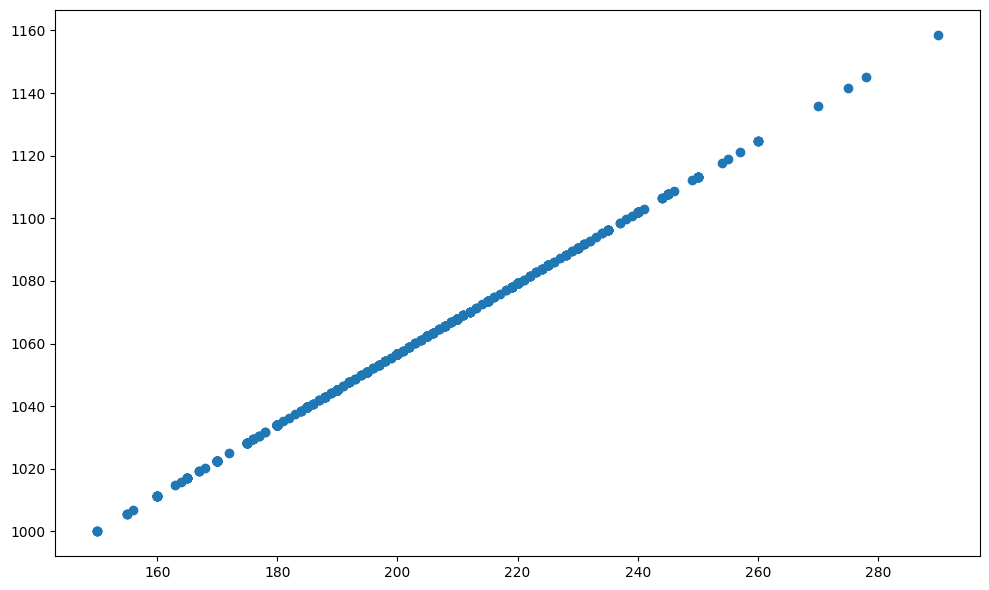

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Dans ce cas, la corrélation est légèrement plus faible, mais elle reste assez élevée. Maintenant, pour rendre la relation encore moins évidente, nous pourrions vouloir ajouter un peu plus d'aléatoire en ajoutant une variable aléatoire au salaire. Voyons ce qui se passe :


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


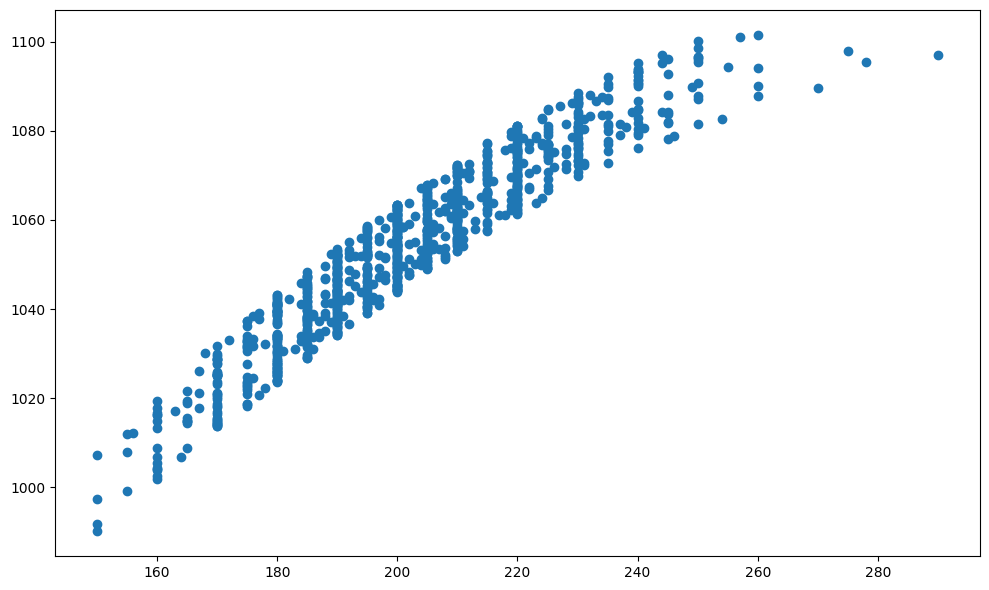

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Pouvez-vous deviner pourquoi les points s'alignent en lignes verticales comme ceci ?

Nous avons observé la corrélation entre un concept artificiellement conçu comme le salaire et la variable observée *taille*. Voyons également si deux variables observées, comme la taille et le poids, sont corrélées :


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Malheureusement, nous n'avons obtenu aucun résultat - seulement des valeurs étranges `nan`. Cela est dû au fait que certaines des valeurs dans notre série sont indéfinies, représentées par `nan`, ce qui rend également le résultat de l'opération indéfini. En examinant la matrice, nous pouvons voir que la colonne problématique est `Weight`, car l'auto-corrélation entre les valeurs de `Height` a été calculée.

> Cet exemple montre l'importance de la **préparation** et du **nettoyage** des données. Sans données adéquates, nous ne pouvons rien calculer.

Utilisons la méthode `fillna` pour remplir les valeurs manquantes, puis calculons la corrélation :


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

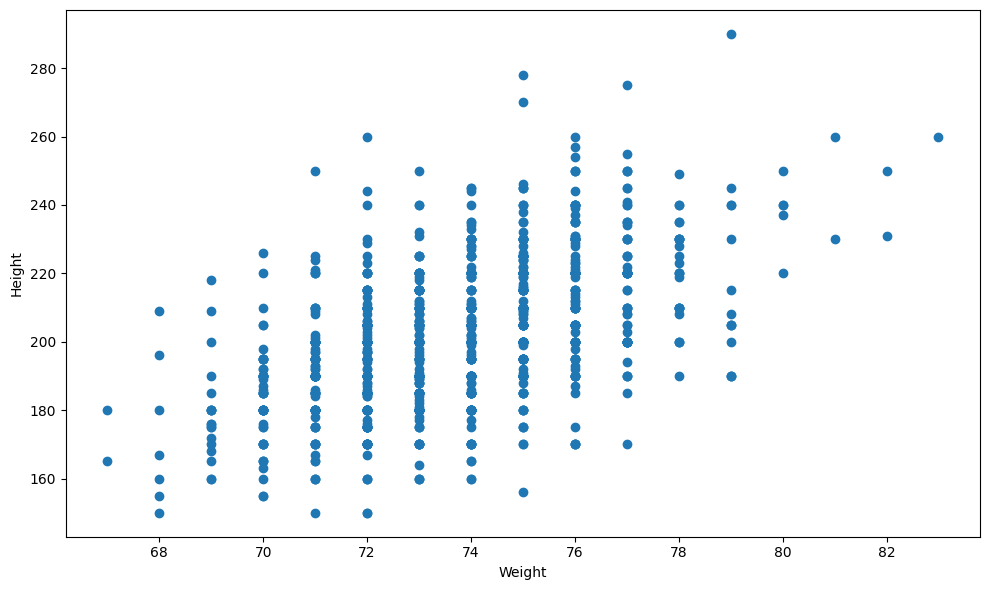

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Conclusion

Dans ce notebook, nous avons appris à effectuer des opérations de base sur les données pour calculer des fonctions statistiques. Nous savons désormais comment utiliser un ensemble solide d'outils mathématiques et statistiques pour prouver certaines hypothèses, ainsi que comment calculer des intervalles de confiance pour des variables arbitraires à partir d'un échantillon de données.



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de faire appel à une traduction humaine professionnelle. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
